Emilio Taggi 1910388 2023/01/16

In [3]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#with these we can print variables 'inline'
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# 0. What we did during lectures

In [8]:
#starting from what done during the lectures:

# Import modules
import matplotlib.pyplot as plt
import math
import numpy as np

# Gravity!
g = 9.8   # m/s^2

# Function to test values provided for initial conditions or integration settings
# The 4 parameters that the user may want to customize are:
# 1) the time step (dt)
# 2) the angle at which the bullet is shot (theta)
# 3) the height from which the bullet is shot (h)
# 4) the speed at which the bullet is shot (v0)
def test_val(var, val):
    test = False
    # Accept integration steps and initial velocities only if > 0
    if var in ['dt', 'v0']:
        test = val>0
    # Accept initial height >= 0
    elif var=='h':
        test = val>=0
    # Assuming that val can only be 'theta' at this point
    # allow only 0 < theta < 90 [degrees]
    else:
        test = (val>0 and val<90)

    return test
        

# Function to handle reading in initial conditions and integration settings
def set_param(var):
    # Dictionary of default values
    defaults = {
        'dt':     0.01, # [s] Default value of the time step
        'theta': 23.,  # [deg] Default value of the angle at which the bullet is shot
        'h':      5.,  # [m] Default value of the height from which the bullet is shot
        'v0':     10., # [m/s] Default value of the speed at which the bullet is shot
    }
    # Dictionary of info messages to the user
    msgs = {
        'dt': "Insert dt > 0 in sec (press return for {0} sec): ".format(defaults['dt']),
        'theta': "Insert angle theta in (0,90) degrees (press return for {0} degrees): ".format(defaults['theta']),
        'h': "Insert initial height h in m: (press return for h = {0} m): ".format(defaults['h']),
        'v0': "Insert v_0 > 0 in m/s (press return for {0} m/s): ".format(defaults['v0'])
    }
    # Start by reading a value and continue until happy with value provided
    while True:
        val_in = input(msgs[var])
        # Allow default value
        if val_in=="":
            val_out = defaults[var]
            break
        # Convert to float...
        try:
            val_out = float(val_in)
        except:
            val_out = -1
        # ...and test value
        if test_val(var, val_out):
            break

    # Convert theta from degrees to radians
    if var=='theta':
        val_out = math.radians(val_out)
    
    return val_out

In [10]:
# Offer the user the chance to customize values of dt, theta, h, v0
dt = set_param('dt')
theta = set_param('theta')
h = set_param('h')
v0 = set_param('v0')

Insert dt > 0 in sec (press return for 0.01 sec): 
Insert angle theta in (0,90) degrees (press return for 23.0 degrees): 
Insert initial height h in m: (press return for h = 5.0 m): 
Insert v_0 > 0 in m/s (press return for 10.0 m/s): 


Insert dt > 0 in sec (press return for 0.01 sec): 
Insert angle theta in (0,90) degrees (press return for 23.0 degrees): 
Insert initial height h in m: (press return for h = 5.0 m): 
Insert v_0 > 0 in m/s (press return for 10.0 m/s): 
v0_x: 9.205 m/s 	 v0_y: 3.907 m/s
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
total steps:	 149 
last x:		 13.62
last y:		 0.050


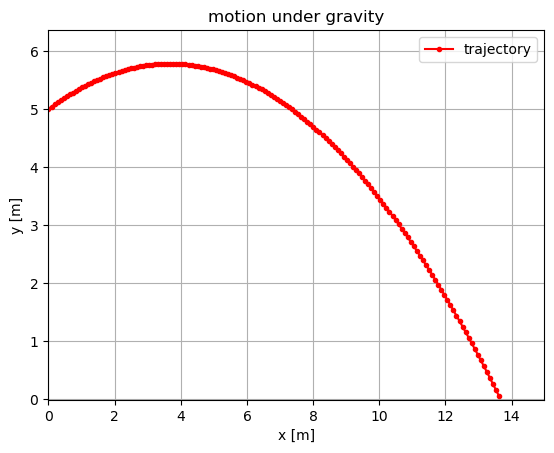

In [9]:
# Compute initial velocity components
v0x = v0*math.cos(theta)
v0y = v0*math.sin(theta)
print("v0_x: %.3f m/s \t v0_y: %.3f m/s"%(v0x,v0y))

# Initial position coordinates
x0 = 0
y0 = h

# "Evolution" functions
def x(t):
    return x0 + v0x*t

def y(t):
    return y0 + v0y*t - 0.5*g*t*t

# Generate list of times for sampling
times = np.arange(0., 1000., dt).tolist() 

# Print first 10 elements
print(times[:10])

# Compute x(t_i)
xi = [x(t) for t in times if y(t)>=0.]

# Compute y(t_i)
yi = [y(t) for t in times if y(t)>=0.]

print( "total steps:\t %-4d"%len(xi))
print( "last x:\t\t %.2f"%xi[-1])
print( "last y:\t\t %.3f"%yi[-1])

%matplotlib inline
# Plot results...
plt.plot(xi, yi, label='trajectory', color='red', marker='.')
plt.legend()

# ...and make them look good
plt.title('motion under gravity')
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.grid(True)
plt.xlim(-0.01, max(xi)*1.1)
plt.ylim(-0.01,max(yi)*1.10)

# Only for script
plt.show()
# or use this to save your plot
#plt.savefig("./gravity.png")

# 1.

In [152]:
# Gravity!
g = 9.8   # m/s^2

# Function to test values provided for initial conditions or integration settings
# The 4 parameters that the user may want to customize are:
# 1) the time step (dt)
# 2) the angle at which the bullet is shot (theta)
# 3) the height from which the bullet is shot (h)
# 4) the speed at which the bullet is shot (v0)
def test_val_e(var, val):
    test = False
    # Accept integration steps and initial velocities only if > 0
    if var in ['dt', 'v0','N','E','Te','M']:
        test = val>0
    # Accept initial height >= 0
    elif var=='h':
        test = val>=0
    # Assuming that val can only be 'theta' at this point
    # allow only 0 < theta < 90 [degrees]
    else:
        test = (val>0 and val<90)

    return test
        

# Function to handle reading in initial conditions and integration settings
def set_param_e(var):
    # Dictionary of default values
    defaults = {
        'dt':     0.01, # [s] Default value of the time step
        'theta': 23.,  # [deg] Default value of the angle at which the bullet is shot
        'h':      5.,  # [m] Default value of the height from which the bullet is shot
        'v0':     10., # [m/s] Default value of the speed at which the bullet is shot
        'N': 3, #number of pieaces in the explosion
        'Te': 0.45, #[s] time of the explosion
        'E': 5, #[J] energy of the explosion
        'M' :10 #[kg] mass of mother projectile
    }
    # Dictionary of info messages to the user
    msgs = {
        'dt': "Insert dt > 0 in sec (press return for {0} sec): ".format(defaults['dt']),
        'theta': "Insert angle theta in (0,90) degrees (press return for {0} degrees): ".format(defaults['theta']),
        'h': "Insert initial height h in m: (press return for h = {0} m): ".format(defaults['h']),
        'v0': "Insert v_0 > 0 in m/s (press return for {0} m/s): ".format(defaults['v0']),
        'N': "Insert N > 0  (press return for {0} ): ".format(defaults['N']),
        'Te': "Insert Te > 0  (press return for {0} ): ".format(defaults['Te']),
        'E': "Insert E > 0  (press return for {0} ): ".format(defaults['E']),
        'M': "Insert M > 0  (press return for {0} ): ".format(defaults['M'])
    }
    # Start by reading a value and continue until happy with value provided
    while True:
        val_in = input(msgs[var])
        # Allow default value
        if val_in=="":
            val_out = defaults[var]
            break
        # Convert to float...
        try:
            val_out = float(val_in)
        except:
            val_out = -1
        # ...and test value
        if test_val_e(var, val_out):
            break

    # Convert theta from degrees to radians
    if var=='theta':
        val_out = math.radians(val_out)
    if var=='N':
        val_out = int(val_out)
    
    return val_out

Up to Te time of explosion the plot is the same, then I simulate a parabolic motion for each projectile

In [153]:
# Offer the user the chance to customize values of dt, theta, h, v0
dt = set_param_e('dt')
theta = set_param_e('theta')
h = set_param_e('h')
v0 = set_param_e('v0')
N = set_param_e('N')
E = set_param_e('E')
Te = set_param_e('Te')
M = set_param_e('M')

Insert dt > 0 in sec (press return for 0.01 sec): 
Insert angle theta in (0,90) degrees (press return for 23.0 degrees): 
Insert initial height h in m: (press return for h = 5.0 m): 
Insert v_0 > 0 in m/s (press return for 10.0 m/s): 
Insert N > 0  (press return for 3 ): 6
Insert E > 0  (press return for 5 ): 6
Insert Te > 0  (press return for 0.45 ): 0.7
Insert M > 0  (press return for 10 ): 


In [154]:
#start simulation
# Compute initial velocity components
v0x_mother = v0*math.cos(theta)
v0y_mother = v0*math.sin(theta)
# Initial position coordinates
x0_mother = 0
y0_mother = h
# "Evolution" functions
def x(t,x0,v0x):
    return x0 + v0x*t

def y(t,y0,v0y):
    return y0 + v0y*t - 0.5*g*t*t

# Generate list of times for sampling
times = np.arange(0., Te, dt).tolist() 

# Compute x(t_i)
x_mother = [x(t,x0_mother,v0x_mother) for t in times if y(t,x0_mother,v0x_mother)>=0.]
# Compute y(t_i)
y_mother = [y(t,y0_mother,v0y_mother) for t in times if y(t,y0_mother,v0y_mother)>=0.]

In [155]:
def parabolicMotion(theta,x0,y0,v0):    
    # Compute initial velocity components
    v0x = v0*math.cos(theta) + v0x_mother
    v0y = v0*math.sin(theta) + v0y_mother - g*Te

    # Generate list of times for sampling
    times = np.arange(0., 1000., dt).tolist() 


    # Compute x(t_i)
    xi = [x(t,x0,v0x) for t in times if y(t,y0,v0y)>=0.]

    # Compute y(t_i)
    yi = [y(t,y0,v0y) for t in times if y(t,y0,v0y)>=0.]
    
    return [xi,yi]

In [156]:
sonList = []
vson = N * np.sqrt(2*E/M) 
sonList.append( parabolicMotion(np.pi/2,x_mother[-1],y_mother[-1],vson) )
for i in range(1,N):
    sonList.append( parabolicMotion(np.random.uniform(0,2*np.pi),x_mother[-1],y_mother[-1],vson) )

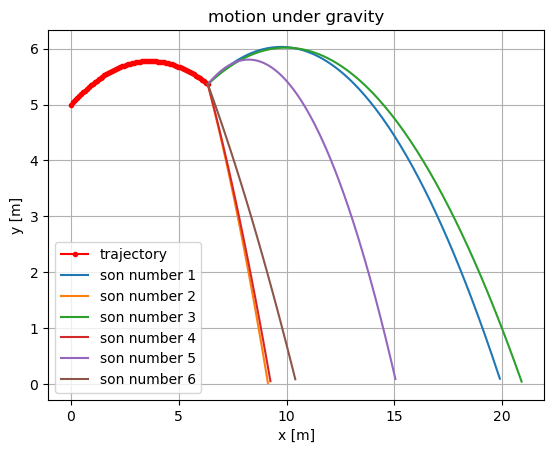

In [158]:
%matplotlib inline
# Plot results...
plt.plot(x_mother, y_mother, label='trajectory', color='red', marker='.')


# ...and make them look good
plt.title('motion under gravity')
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.grid(True)
#plt.xlim(-0.01, max(xi)*1.1)
#plt.ylim(-0.01,max(yi)*1.10)

for i,son in enumerate(sonList):
    plt.plot(son[0],son[1],label=f'son number {i+1}')
    
plt.legend()

# plot saving
plt.savefig("./fireworks.png")

# Only for script
plt.show()

In [159]:
#data storing (done wrong)
outfile = 'simulation.dat'
alldata = [(x,y) for x,y in sonList]
alldata.append((x_mother,y_mother))
allData = np.asarray(alldata)
np.save(outfile, allData)

/tmp/ipykernel_11454/3251185915.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  allData = np.asarray(alldata)
